# AUSTO MOTOR COMPANY

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew   

In [ ]:
print(np.__version__)
print(pd.__version__)
print(sns.__version__)

1.22.4
1.3.5
0.11.2


In [ ]:
path = '/content/austo_automobile+%282%29+%281%29.csv'
df = pd.read_csv(path)


In [ ]:
df.shape

(1581, 14)

In [ ]:
df.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV


In [ ]:
df['Marital_status'] = df.Marital_status.astype('category')
df['Marital_status'] = df['Marital_status'].cat.codes

In [ ]:
df['Personal_loan'] = df.Personal_loan.astype('category')
df['Personal_loan'] = df['Personal_loan'].cat.codes

In [ ]:
df['House_loan'] = df.House_loan.astype('category')
df['House_loan'] = df['House_loan'].cat.codes

In [ ]:
df['Partner_working'] = df.Partner_working.astype('category')
df['Partner_working'] = df['Partner_working'].cat.codes

In [ ]:
df.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,0,Post Graduate,4,0,0,1,99300,70700.0,170000,61000,SUV
1,53,Female,Salaried,0,Post Graduate,4,1,0,1,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,0,Post Graduate,3,0,0,1,97300,60700.0,158000,57000,SUV
3,53,Female,Salaried,0,Graduate,2,1,0,1,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,0,Post Graduate,3,0,0,1,79700,60200.0,139900,57000,SUV


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   int8   
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   int8   
 7   House_loan        1581 non-null   int8   
 8   Partner_working   1581 non-null   int8   
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   float64
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(2), int64(4), int8(4), object(4)
memory usage: 129.8+ KB


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.0+ KB


In [ ]:
df['No_of_Dependents']=df['No_of_Dependents'].astype('float64')

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1581.0,31.922201,8.425978,22.0,25.0,29.0,38.0,54.0
No_of_Dependents,1581.0,2.457938,0.943483,0.0,2.0,2.0,3.0,4.0
Salary,1581.0,60392.220114,14674.825044,30000.0,51900.0,59500.0,71800.0,99300.0
Partner_salary,1475.0,20225.559322,19573.149277,0.0,0.0,25600.0,38300.0,80500.0
Total_salary,1581.0,79625.996205,25545.857768,30000.0,60500.0,78000.0,95900.0,171000.0
Price,1581.0,35597.722960,13633.636545,18000.0,25000.0,31000.0,47000.0,70000.0


In [ ]:
pd.Series(df['Partner_salary']).skew()

0.33825489824593036

In [ ]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups]

Number of duplicate rows = 0


,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make


In [ ]:
df['Gender'].unique()

array(['Male', 'Femal', 'Female', nan, 'Femle'], dtype=object)

In [ ]:
df.Gender.fillna (df.Gender.mode(), inplace=True)

In [ ]:
df['Gender']=df['Gender'].replace('Femal', 'Female')

In [ ]:
df['Gender']=df['Gender'].replace('Femle', 'Female')

In [ ]:
df['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

<AxesSubplot:xlabel='Total_salary'>

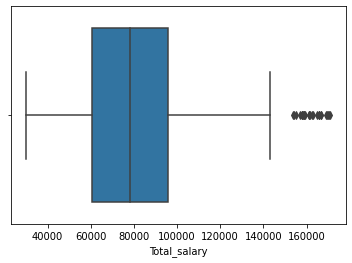

In [ ]:
sns.boxplot (data = df, x= 'Total_salary')

In [ ]:
def detect_outlier(col):
   Q1,Q3 = np.percentile(col,[25,75])
   IQR=Q3-Q1
   lower_range= Q1-(1.5 * IQR)
   upper_range= Q3+(1.5 * IQR)
   return lower_range, upper_range

In [ ]:
lr,ur=detect_outlier(df['Total_salary'])
print ('lower range', lr, 'and upper range', ur)

lower range 7400.0 and upper range 149000.0


In [ ]:
df['Total_salary']= np.where(df['Total_salary']>ur,ur,df['Total_salary'])

<AxesSubplot:xlabel='Total_salary'>

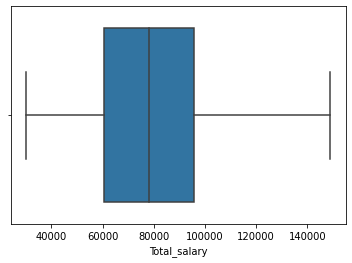

In [ ]:
sns.boxplot (data = df, x= 'Total_salary')

<AxesSubplot:xlabel='Age'>

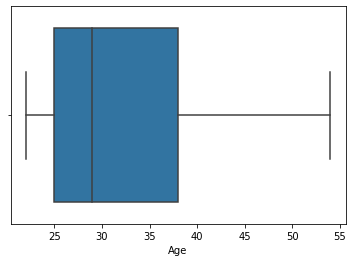

In [ ]:
sns.boxplot (data = df, x= 'Age')

<AxesSubplot:xlabel='Gender', ylabel='count'>

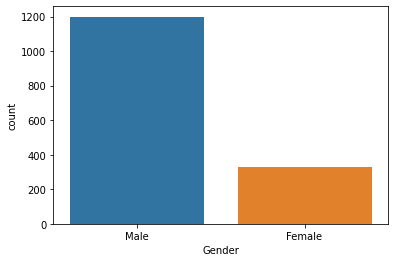

In [ ]:
sns.countplot (data = df, x= 'Gender')

In [ ]:
df['Gender'].value_counts()

Male      1199
Female     329
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Profession', ylabel='count'>

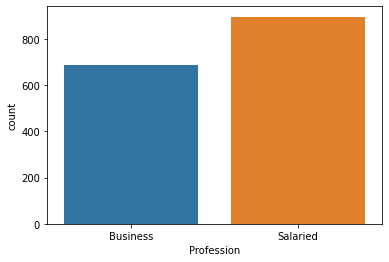

In [ ]:
sns.countplot (data = df, x= 'Profession')

In [ ]:
df['Profession'].value_counts()

Salaried    896
Business    685
Name: Profession, dtype: int64

<AxesSubplot:xlabel='Education', ylabel='count'>

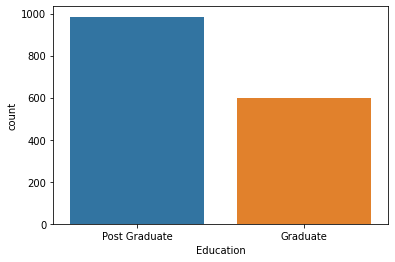

In [ ]:
sns.countplot (data = df, x= 'Education')

In [ ]:
df['Education'].value_counts()

Post Graduate    985
Graduate         596
Name: Education, dtype: int64

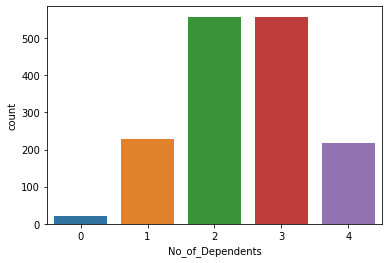

In [ ]:
g=sns.countplot (data = df, x = 'No_of_Dependents')
g.set_xticks(range(5));

In [ ]:
df['No_of_Dependents'].value_counts()

3    557
2    557
1    229
4    218
0     20
Name: No_of_Dependents, dtype: int64

<AxesSubplot:xlabel='Personal_loan', ylabel='count'>

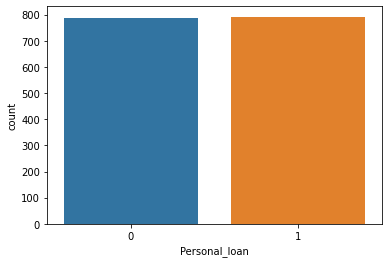

In [ ]:
sns.countplot (data = df, x= 'Personal_loan')

In [ ]:
df['Personal_loan'].value_counts()

1    792
0    789
Name: Personal_loan, dtype: int64

<AxesSubplot:xlabel='House_loan', ylabel='count'>

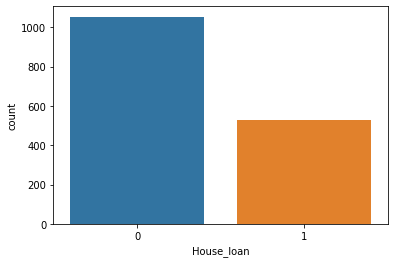

In [ ]:
sns.countplot (data = df, x= 'House_loan')

In [ ]:
df['House_loan'].value_counts()

No     1054
Yes     527
Name: House_loan, dtype: int64

<AxesSubplot:xlabel='Partner_working', ylabel='count'>

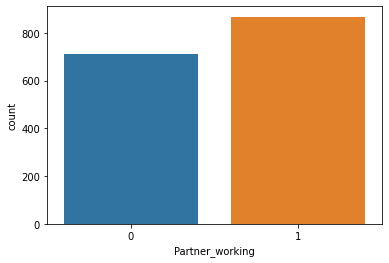

In [ ]:
sns.countplot (data = df, x= 'Partner_working')

In [ ]:
df['Partner_working'].value_counts()

Yes    868
No     713
Name: Partner_working, dtype: int64

<AxesSubplot:xlabel='Salary'>

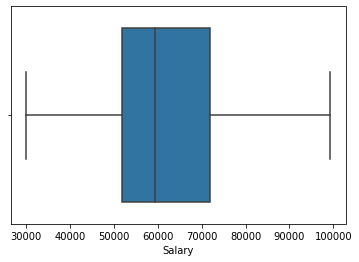

In [ ]:
sns.boxplot (data = df, x= 'Salary')

<AxesSubplot:xlabel='Partner_salary'>

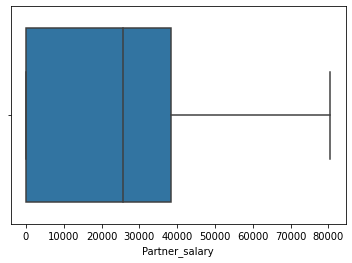

In [ ]:
sns.boxplot (data = df, x= 'Partner_salary')

<AxesSubplot:xlabel='Price'>

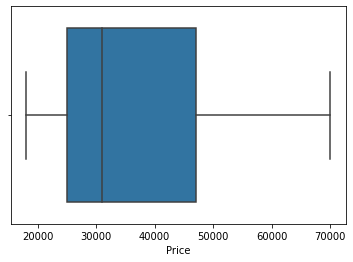

In [ ]:
sns.boxplot (data = df, x= 'Price')

<AxesSubplot:xlabel='Make', ylabel='count'>

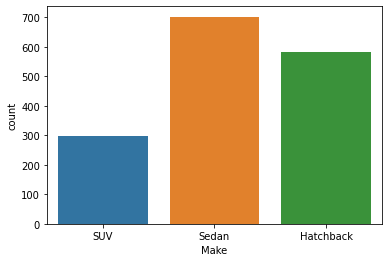

In [ ]:
sns.countplot (data = df, x= 'Make')

In [ ]:
df['Make'].value_counts()

Sedan        702
Hatchback    582
SUV          297
Name: Make, dtype: int64

<AxesSubplot:xlabel='Make', ylabel='count'>

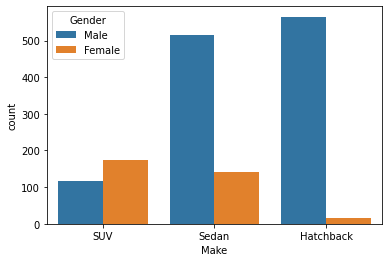

In [ ]:
sns.countplot (data = df, x= 'Make', hue = 'Gender')

<AxesSubplot:xlabel='No_of_Dependents', ylabel='Make'>

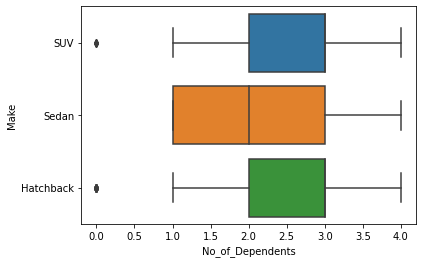

In [ ]:
sns.boxplot (data = df, x= 'No_of_Dependents', y= 'Make')

<AxesSubplot:xlabel='Marital_status', ylabel='count'>

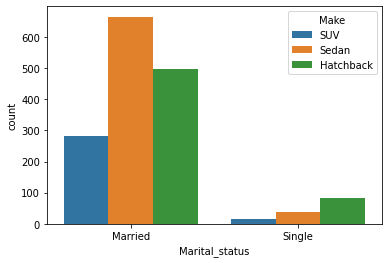

In [ ]:
sns.countplot(data = df, x = 'Marital_status', hue = 'Make')

<AxesSubplot:xlabel='House_loan', ylabel='count'>

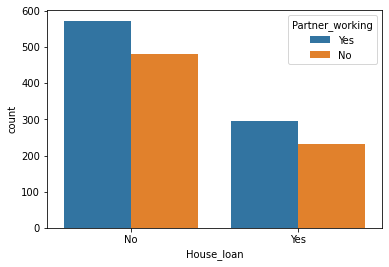

In [ ]:
sns.countplot (data=df, x= 'House_loan', hue = 'Partner_working' )

<AxesSubplot:xlabel='Personal_loan', ylabel='count'>

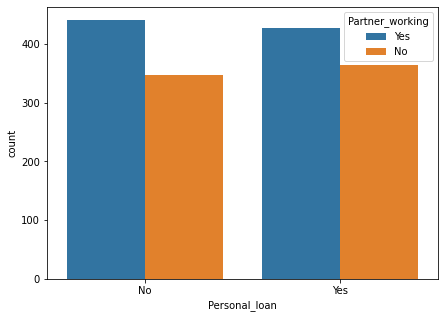

In [ ]:
plt.figure(figsize=(7,5))
plt.legend(loc='upper left')
sns.countplot (data=df, x= 'Personal_loan', hue = 'Partner_working' )

<AxesSubplot:xlabel='Make', ylabel='count'>

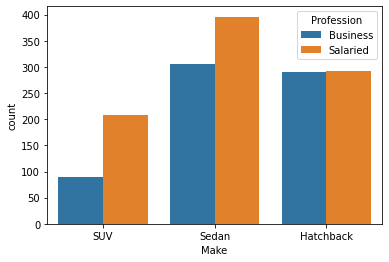

In [ ]:
sns.countplot (data=df, x= 'Make', hue = 'Profession' )

<AxesSubplot:xlabel='Price', ylabel='Profession'>

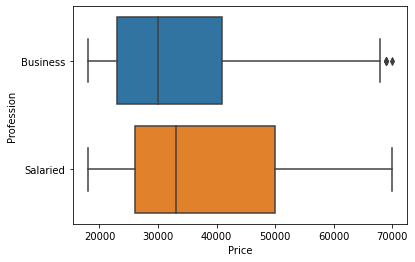

In [ ]:
sns.boxplot (data=df, x = 'Price', y = 'Profession' )

<AxesSubplot:xlabel='Age', ylabel='Make'>

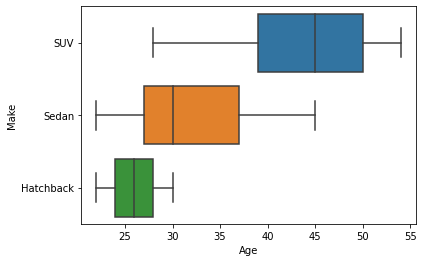

In [ ]:
sns.boxplot (data=df, x = 'Age', y = 'Make' )

<AxesSubplot:xlabel='Age', ylabel='Price'>

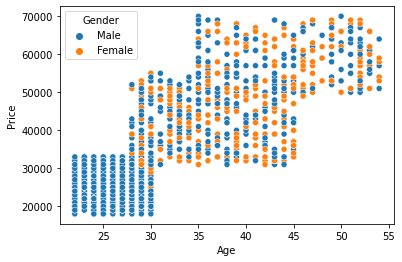

In [ ]:
sns.scatterplot (data= df, x= 'Age', y= 'Price' , hue= 'Gender')

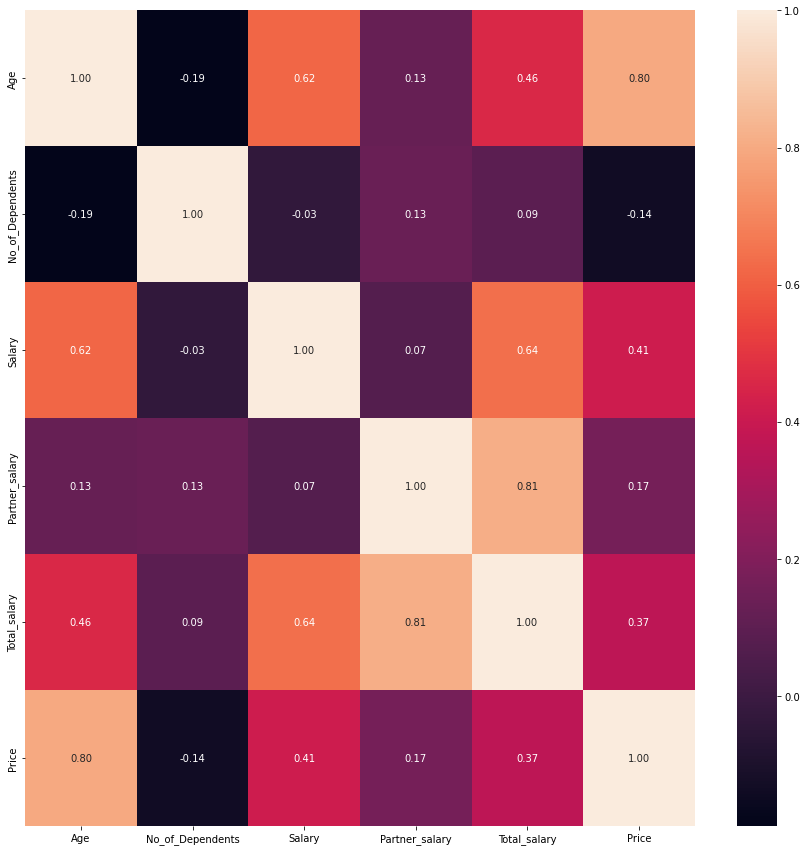

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,fmt='.2f');

<AxesSubplot:xlabel='Make', ylabel='count'>

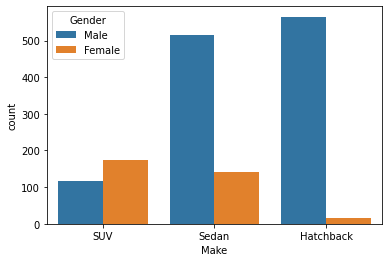

In [ ]:
sns.countplot (data=df, x= 'Make', hue = 'Gender' )

<AxesSubplot:xlabel='Make', ylabel='count'>

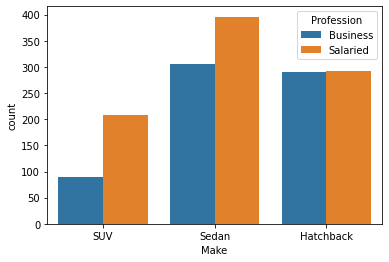

In [ ]:
sns.countplot (data=df, x= 'Make', hue = 'Profession' )

<AxesSubplot:xlabel='Price', ylabel='Gender'>

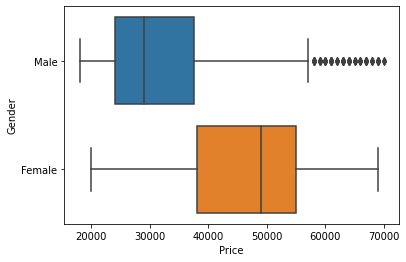

In [ ]:
sns.boxplot (data=df, x = 'Price', y = 'Gender' )

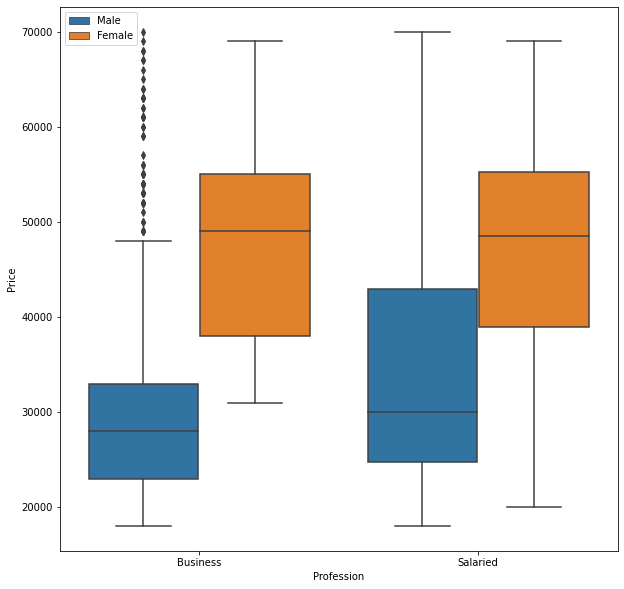

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df, x='Profession', y= 'Price', hue='Gender')
plt.legend (loc='upper left')

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 89.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 92.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Figure size 3600x3600 with 0 Axes>

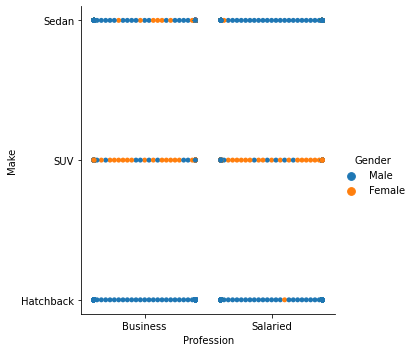

In [ ]:
plt.figure (figsize=(50,50))
sns.catplot (data=df, x="Profession", y="Make", hue="Gender", kind="swarm")

<AxesSubplot:xlabel='Price', ylabel='Personal_loan'>

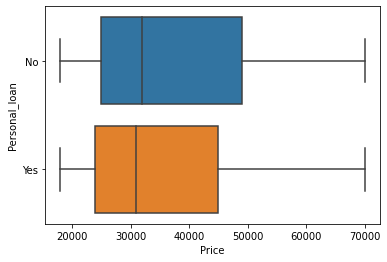

In [ ]:
sns.boxplot (data=df, x = 'Price', y = 'Personal_loan' )

<AxesSubplot:xlabel='Price', ylabel='Partner_working'>

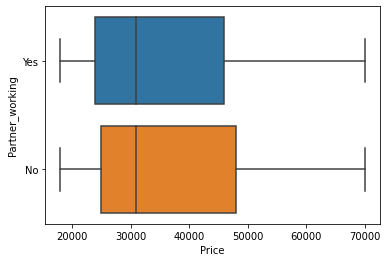

In [ ]:
sns.boxplot (data=df, x = 'Price', y = 'Partner_working' )

<AxesSubplot:xlabel='Price', ylabel='Gender'>

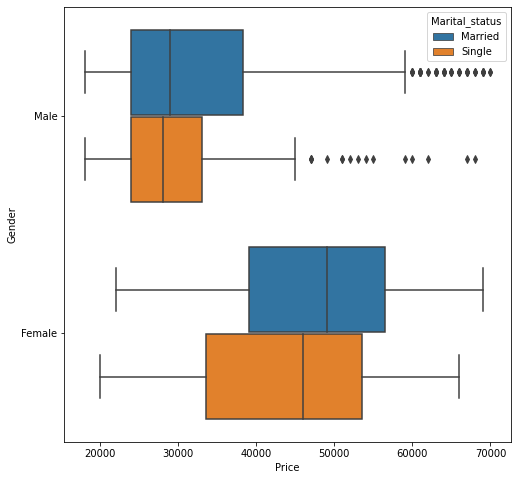

In [ ]:
plt.figure (figsize=(8,8))
sns.boxplot (data= df, x= 'Price', y= 'Gender' , hue= 'Marital_status')

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 95.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 54.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Figure size 720x720 with 0 Axes>

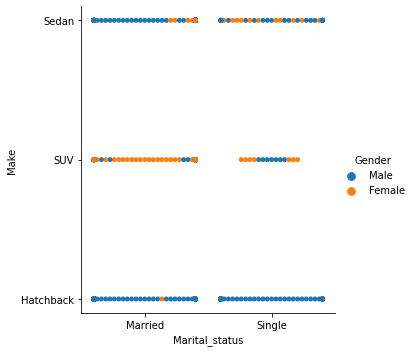

In [ ]:
plt.figure (figsize=(10,10))
sns.catplot (data=df, x="Marital_status", y="Make", hue="Gender", kind="swarm");

<AxesSubplot:xlabel='Gender', ylabel='count'>

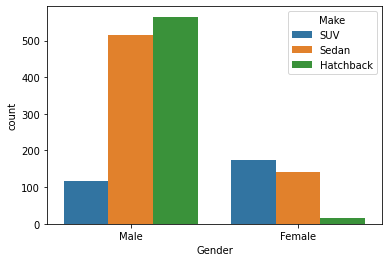

In [ ]:
sns.countplot (data= df, x= 'Gender', hue= 'Make')

# GODIGT BANK

In [ ]:
path1 = '/content/godigt_cc_data.xlsx'
data = pd.read_excel(path1)

In [ ]:
data.head()

,userid,card_no,card_bin_no,Issuer,card_type,card_source_date,high_networth,active_30,active_60,active_90,...,bank_vintage,T+1_month_activity,T+2_month_activity,T+3_month_activity,T+6_month_activity,T+12_month_activity,Transactor_revolver,avg_spends_l3m,Occupation_at_source,cc_limit
0,1,4384 39XX XXXX XXXX,438439,Visa,edge,2019-09-29,B,0,1,1,...,27,0,0,0,0,0,T,27729,Self Employed,290000
1,2,4377 48XX XXXX XXXX,437748,Visa,prosperity,2002-10-30,A,1,1,1,...,52,0,0,0,0,0,R,280854,0,950000
2,3,4377 48XX XXXX XXXX,437748,Visa,rewards,2013-10-05,C,0,0,0,...,23,1,0,0,0,0,R,70587,Student,210000
3,4,4258 06XX XXXX XXXX,425806,Visa,indianoil,1999-06-01,E,0,1,1,...,49,0,0,1,0,0,T,9156,Self Employed,80000
4,5,4377 48XX XXXX XXXX,437748,Visa,edge,2006-06-13,B,1,1,1,...,21,1,0,0,0,0,T,38108,Salaried,220000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8448 entries, 0 to 8447
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   userid                   8448 non-null   int64         
 1   card_no                  8448 non-null   object        
 2   card_bin_no              8448 non-null   int64         
 3   Issuer                   8448 non-null   object        
 4   card_type                8448 non-null   object        
 5   card_source_date         8448 non-null   datetime64[ns]
 6   high_networth            8448 non-null   object        
 7   active_30                8448 non-null   int64         
 8   active_60                8448 non-null   int64         
 9   active_90                8448 non-null   int64         
 10  cc_active30              8448 non-null   int64         
 11  cc_active60              8448 non-null   int64         
 12  cc_active90              8448 non-

In [ ]:
data.describe()

,userid,card_bin_no,active_30,active_60,active_90,cc_active30,cc_active60,cc_active90,widget_products,engagement_products,annual_income_at_source,bank_vintage,T+1_month_activity,T+2_month_activity,T+3_month_activity,T+6_month_activity,T+12_month_activity,avg_spends_l3m,cc_limit
count,8448.00000,8448.000000,8448.000000,8448.000000,8448.000000,8448.000000,8448.000000,8448.000000,8448.000000,8448.000000,8.448000e+03,8448.000000,8448.000000,8448.000000,8448.000000,8448.000000,8448.000000,8448.000000,8448.000000
mean,4224.50000,436747.044508,0.292377,0.494792,0.642045,0.284091,0.484493,0.632339,3.614583,3.991122,1.674595e+06,33.164181,0.111269,0.047940,0.080374,0.008878,0.009470,49527.365530,251706.912879
std,2438.87187,30489.752417,0.454881,0.500002,0.479427,0.451007,0.499789,0.482197,2.273193,2.572135,1.064307e+06,15.868344,0.314483,0.213653,0.271888,0.093809,0.096856,46244.954836,229114.856385
min,1.00000,376916.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000950e+05,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2112.75000,426241.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,1.061104e+06,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17110.000000,90000.000000
50%,4224.50000,437551.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,4.000000,4.000000,1.372134e+06,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37943.000000,150000.000000
75%,6336.25000,438439.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,6.000000,1.881734e+06,47.000000,0.000000,0.000000,0.000000,0.000000,0.000000,66095.750000,350000.000000
max,8448.00000,524178.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,8.000000,4.999508e+06,60.000000,1.000000,1.000000,1.000000,1.000000,1.000000,289292.000000,990000.000000


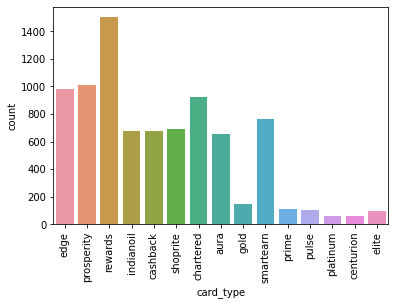

In [ ]:
sns.countplot (data=data, x= 'card_type')
plt.xticks (rotation=90);

In [ ]:
data['card_type'].value_counts()

rewards       1502
prosperity    1007
edge           980
chartered      923
smartearn      765
shoprite       688
indianoil      680
cashback       676
aura           652
gold           145
prime          112
pulse          101
elite           96
centurion       62
platinum        59
Name: card_type, dtype: int64

<AxesSubplot:xlabel='Transactor_revolver', ylabel='count'>

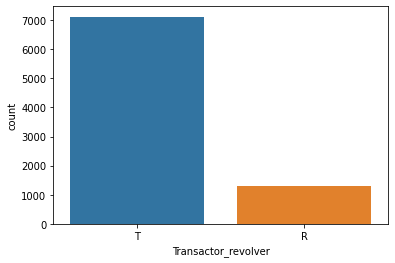

In [ ]:
sns.countplot (data=data, x= 'Transactor_revolver')

In [ ]:
data['Transactor_revolver'].value_counts()

T    7115
R    1295
Name: Transactor_revolver, dtype: int64

<AxesSubplot:xlabel='other_bank_cc_holding', ylabel='count'>

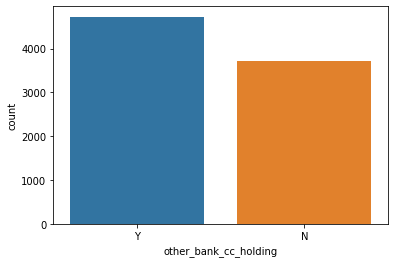

In [ ]:
sns.countplot (data=data, x= 'other_bank_cc_holding')

In [ ]:
data['other_bank_cc_holding'].value_counts()

Y    4728
N    3720
Name: other_bank_cc_holding, dtype: int64

<AxesSubplot:xlabel='avg_spends_l3m'>

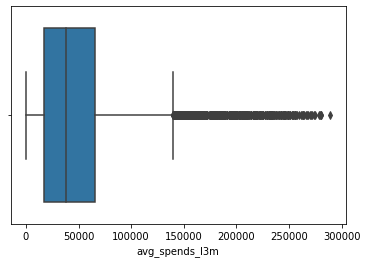

In [ ]:
sns.boxplot (data=data, x= 'avg_spends_l3m')

<AxesSubplot:xlabel='widget_products', ylabel='count'>

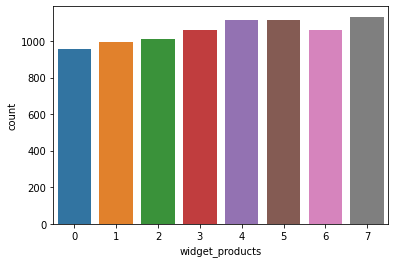

In [ ]:
sns.countplot (data=data, x= 'widget_products')

In [ ]:
data['widget_products'].value_counts()

7    1132
4    1117
5    1115
6    1062
3    1060
2    1010
1     997
0     955
Name: widget_products, dtype: int64